In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
% matplotlib inline

In [2]:
train = pd.read_csv('diabetes.csv')

In [3]:
print(train.columns)
print(train.dtypes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
train['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

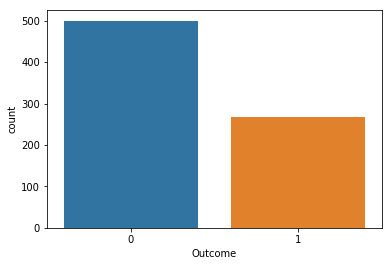

In [6]:
sns.countplot(train['Outcome'],label = 'Count')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#splitting the dataset into test and train set
# checking with KNN model
x = train.iloc[:,:-1]
y = train['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = train['Outcome'])

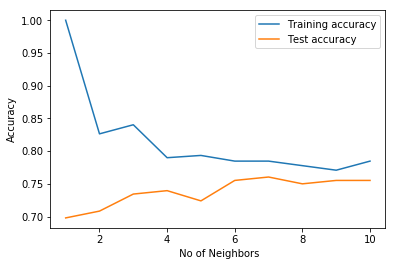

In [21]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# trying for n = 1 to 10
neighbors_setting = range(1,11)
for neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,training_accuracy,label = 'Training accuracy')
plt.plot(neighbors_setting,test_accuracy,label = 'Test accuracy')
plt.xlabel(' No of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Knn comparision')
                             

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('Training accuracy :',round(knn.score(x_train,y_train),3))
print('Test accuracy :',round(knn.score(x_test,y_test),3))

Training accuracy : 0.771
Test accuracy : 0.755


In [61]:
y_pred_Knn= knn.predict(x_test)
confusion_matrix(y_pred_Knn,y_test)

array([[107,  29],
       [ 18,  38]], dtype=int64)

In [37]:
# modelling with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.752
Test set score: 0.792


In [60]:
# Evaluating Logistic regression
y_pred_LR= logreg.predict(x_test)
confusion_matrix(y_pred_LR,y_test)

array([[111,  26],
       [ 14,  41]], dtype=int64)

In [41]:
# modelling with Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
print("Training set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(x_test, y_test)))


Training set score: 1.000
Test set score: 0.672


In [42]:
# Model overfits when DT is used
# modelling with Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
print("Training set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(x_test, y_test)))


Training set score: 0.757
Test set score: 0.740


In [43]:
# Feature importance rates how important each feature is for the decision a tree makes. 
#It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”.
#The feature importances always sum to 1
tree.feature_importances_

array([ 0.06401851,  0.62608858,  0.01068634,  0.        ,  0.        ,
        0.15689563,  0.        ,  0.14231094])

In [58]:
y_pred_DT= tree.predict(x_test)

In [59]:
confusion_matrix(y_pred_DT,y_test)

array([[118,  43],
       [  7,  24]], dtype=int64)

In [46]:
# modelling with SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
print('Train accuracy :',svc.score(x_train,y_train))
print('Test accuracy :',svc.score(x_test,y_test))
# Accuracy result shows the model overfits
# Lets try after scaling the data

Train accuracy : 1.0
Test accuracy : 0.651041666667


In [50]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
x_train_sc = mn.fit_transform(x_train)
x_test_sc = mn.fit_transform(x_test)
svc.fit(x_train_sc,y_train)
svc.fit(x_test_sc,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
print(svc.score(x_train_sc,y_train))
print(svc.score(x_test_sc,y_test))

0.685763888889
0.708333333333


In [53]:
y_pred = svc.predict(x_test)

In [54]:
# Evaluating models
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

In [57]:
cm


0.6510416666666666